# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
###########################
##Michael Riano############
##API Homework#############
##Unc 201808 Data##########
###########################


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
url2 = "&appid="
api_key = "c05ee4a3a5720f4150c5dce1e6a1addc"# I do understand it's not best practice to just make my key available,
units = "imperial"                          #however, posting in other places I kept getting errors. 
website = url+url2+api_key+"&units="+units+"&q=" 

weather_data=[]

for city in cities:
    print(city)
    response = requests.get(website+city).json()
    weather_data.append(response)
    


bambous virieux
bengkulu
saint-philippe
jamestown
albany
kavieng
arraial do cabo
new norfolk
hualmay
mys shmidta
ribeira grande
saleaula
grand river south east
mataura
huarmey
hobart
la asuncion
kashan
douentza
bluff
kloulklubed
hermanus
mount gambier
punta arenas
tasiilaq
cabo san lucas
ambon
tuktoyaktuk
cururupu
ambulu
kaitangata
isangel
taolanaro
port elizabeth
luderitz
nishihara
pevek
ulaangom
ushuaia
mitoc
radishchevo
champagnole
rikitea
kavaratti
cherskiy
mar del plata
butaritari
chokurdakh
huancabamba
bonavista
portland
pisco
kapaa
caravelas
colares
atuona
urumqi
trinidad
georgetown
hilo
vestmanna
bredasdorp
aklavik
payakumbuh
meulaboh
puerto ayora
marcona
port hawkesbury
matsanga
khatanga
vao
lipin bor
vila velha
dharchula
carnarvon
patea
luangwa
iskateley
santa maria
faanui
san patricio
bria
itarema
sidney
tidore
cairns
saskylakh
agadez
fairbanks
port alfred
atar
davila
provideniya
rocha
rawson
jinchang
markova
busselton
beaverton
tiksi
hamilton
east london
tagusao
worland
sao

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

weather_data[0]#to use for my list appends, just viewing one for keys.

{'coord': {'lon': 57.76, 'lat': -20.34},
 'weather': [{'id': 211,
   'main': 'Thunderstorm',
   'description': 'thunderstorm',
   'icon': '11n'}],
 'base': 'stations',
 'main': {'temp': 78.8,
  'pressure': 1016,
  'humidity': 88,
  'temp_min': 78.8,
  'temp_max': 78.8},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 80},
 'clouds': {'all': 40},
 'dt': 1544385600,
 'sys': {'type': 1,
  'id': 2061,
  'message': 0.0035,
  'country': 'MU',
  'sunrise': 1544318494,
  'sunset': 1544366503},
 'id': 1106677,
 'name': 'Bambous Virieux',
 'cod': 200}

In [5]:
temperature = []
lats = []
cloudiness = []
wind_speed = []
humidity = []

for data in weather_data:
    try:
        temperature.append(data['main']['temp_max'])
        lats.append(data['coord']['lat'])
        wind_speed.append(data['wind']['speed'])
        cloudiness.append(data['clouds']['all'])
        humidity.append(data['main']['humidity'])
    except: 
        print("Skip Invalid Data")
        
        continue

Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data
Skip Invalid Data


In [6]:
weather_dict = {
    "Temperature Farenheit":temperature,
    "Latitude":lats,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Humidity":humidity 
}
##I kept getting erros on array's not matching, so i finally just len'ed each to make sure they all 
len(weather_dict["Temperature Farenheit"])
len(weather_dict["Latitude"])
len(weather_dict["Cloudiness"])
len(weather_dict["Wind Speed"])
len(weather_dict["Humidity"])
weather_df=pd.DataFrame(weather_dict)
weather_df.head()
weather_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

#### Latitude vs. Temperature Plot

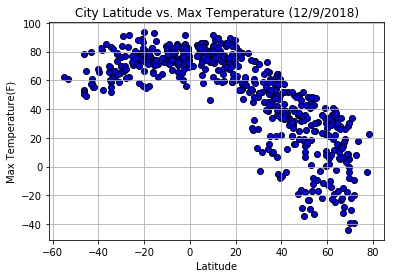

In [7]:
plt.scatter(weather_df["Latitude"], weather_df['Temperature Farenheit'], marker="o",color="b", edgecolor="black")

plt.title("City Latitude vs. Max Temperature (12/9/2018)")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("TemperatureInWorldCities.png")

plt.show()

#### Latitude vs. Humidity Plot

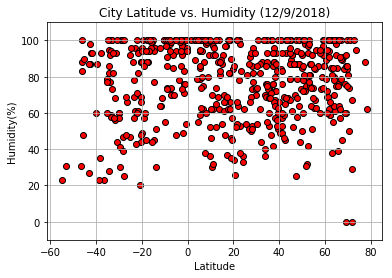

In [8]:
plt.scatter(weather_df["Latitude"], weather_df['Humidity'], marker="o",color="r", edgecolor="black")

plt.title("City Latitude vs. Humidity (12/9/2018)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.ylim(-10,110)
plt.grid(True)

plt.savefig("HumidityInWorldCities.png")

plt.show()

#### Latitude vs. Cloudiness Plot

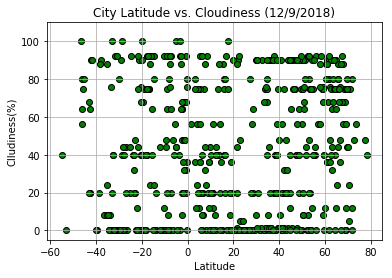

In [9]:
plt.scatter(weather_df["Latitude"], weather_df['Cloudiness'], marker="o",color="green", edgecolor="black")

plt.title("City Latitude vs. Cloudiness (12/9/2018)")
plt.ylabel("Clludiness(%)")
plt.xlabel("Latitude")
plt.ylim(-5,110)
plt.grid(True)

plt.savefig("CloudinessInWorldCities.png")

plt.show()

#### Latitude vs. Wind Speed Plot

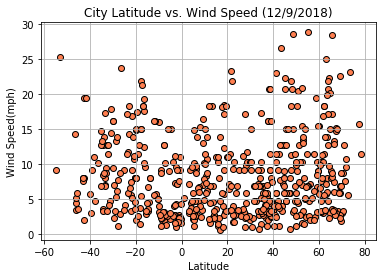

In [10]:
plt.scatter(weather_df["Latitude"], weather_df['Wind Speed'], marker="o",color="coral", edgecolor="black")

plt.title("City Latitude vs. Wind Speed (12/9/2018)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WindSpeedInWorldCities.png")

plt.show()

Observerable trends based on the dataset and plots.
First observable trend: Windspeed seems to not be a direct corrleation with Latitude.  Majority of the windspeeds appear to be below 12.5 MPH today in the world. I believe bigger cities tend to have more measured wind speeds due to buildings creating more narrow corridors to force winds through thus increasing the speed slightly.
Second trend: Humidity amounts do not appear to be realtive to latitudinal location within this specific random dataset.  This assumption corrleates to the data that was pulled today.
Third trend: The higher the latitude, the lower the max temperature.
Fourth Trend: Cloudiness appears realtively even regardless of latitude or city.  The data appears to have an even mixture of cloudy / uncloudy cities today.  